In [1]:
 !pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
import pandas as pd
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def recognize_text(img_path):    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

# Step 3: Overlay recognized text on image using OpenCV

In [4]:
# loads an image, recognizes text, and overlays the text on the image.'''
def overlay_ocr_text(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sentence = ''
    dpi = 60
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    result = recognize_text(img_path)
    data = pd.DataFrame(result, columns=['bbox','text','conf'])
    # if OCR prob is over 0.1, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.1:
            sentence += f'{text} '
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=4)

            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 255), thickness=2)
    print(f'the squence is => {sentence}')
    return axarr[1].imshow(img), data 

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completethe squence is => CC444 TES LATCo m Motor 


(<matplotlib.image.AxesImage at 0x7fdc9186e460>,
                                                 bbox         text      conf
 0   [[490, 632], [773, 632], [773, 709], [490, 709]]        CC444  0.768761
 1   [[537, 699], [694, 699], [694, 725], [537, 725]]  TES LATCo m  0.113507
 2   [[899, 725], [945, 725], [945, 737], [899, 737]]         DUAL  0.087299
 3  [[949, 725], [1011, 725], [1011, 739], [949, 7...        Motor  0.825569)

<Figure size 432x288 with 0 Axes>

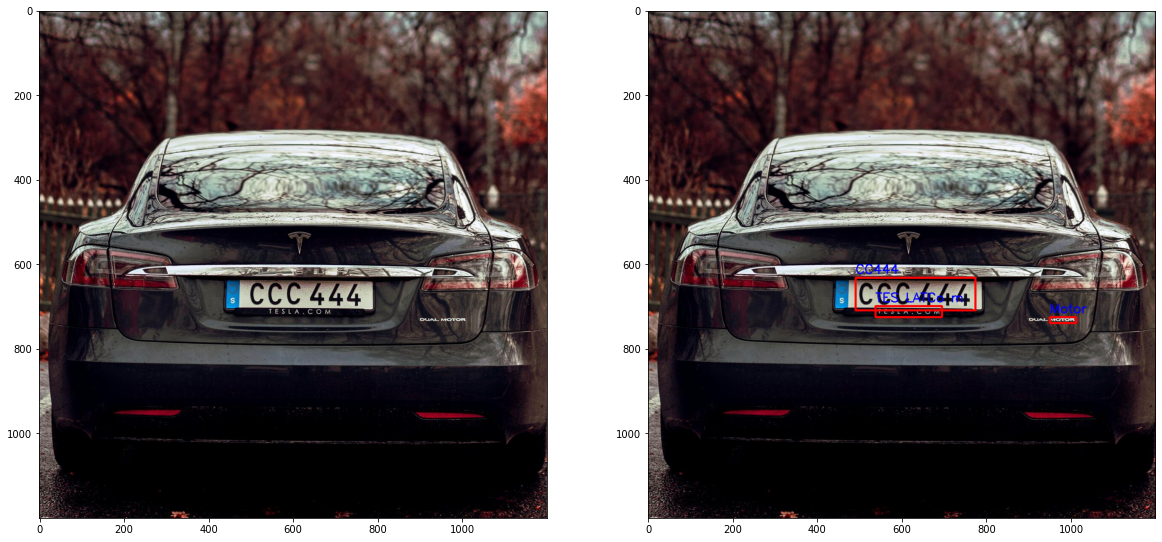

In [5]:
overlay_ocr_text(r'/content/carplate_1.jpg')

the squence is => E4444A 


(<matplotlib.image.AxesImage at 0x7fdbf338ddc0>,
                                                bbox    text      conf
 0  [[495, 658], [717, 658], [717, 720], [495, 720]]  E4444A  0.979104)

<Figure size 432x288 with 0 Axes>

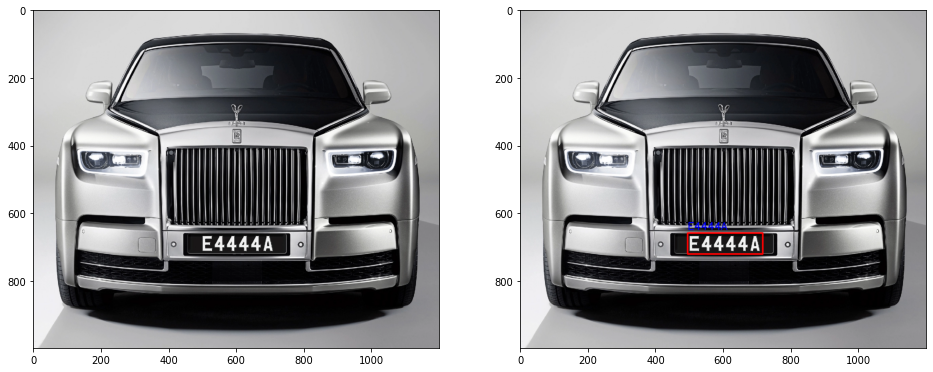

In [6]:
overlay_ocr_text(r'/content/carplate_2.jpg')

the squence is => 30,480 KGS 67,200 LBS 2,185 KGS 4,820 LBS 


(<matplotlib.image.AxesImage at 0x7fdbf33662b0>,
                                                bbox    text      conf
 0    [[169, 67], [473, 67], [473, 177], [169, 177]]  30,480  0.787917
 1    [[521, 64], [700, 64], [700, 178], [521, 178]]     KGS  0.999362
 2  [[166, 155], [475, 155], [475, 279], [166, 279]]  67,200  0.995297
 3  [[523, 155], [697, 155], [697, 267], [523, 267]]     LBS  0.999103
 4  [[221, 245], [475, 245], [475, 359], [221, 359]]   2,185  0.757993
 5  [[524, 245], [698, 245], [698, 359], [524, 359]]     KGS  0.951790
 6  [[223, 343], [475, 343], [475, 453], [223, 453]]   4,820  0.954905
 7  [[523, 343], [699, 343], [699, 453], [523, 453]]     LBS  0.999457)

<Figure size 432x288 with 0 Axes>

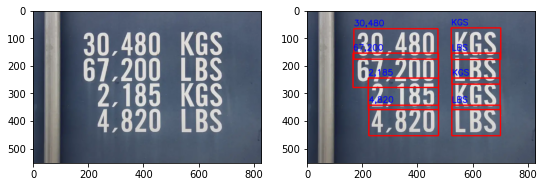

In [7]:
overlay_ocr_text(r'/content/digits_1.jpg')

the squence is => @ 5.99 or Gasolle THS 1941 219, UJnleaded Power 229 Plus Power ~Premium 249 ~Diesel CASH 


(<matplotlib.image.AxesImage at 0x7fdbf0032580>,
                                                  bbox         text      conf
 0      [[201, 91], [219, 91], [219, 125], [201, 125]]            @  0.098676
 1    [[205, 129], [219, 129], [219, 165], [205, 165]]            @  0.361575
 2    [[207, 239], [223, 239], [223, 279], [207, 279]]            @  0.097605
 3    [[239, 307], [311, 307], [311, 347], [239, 347]]         5.99  0.713992
 4    [[220, 341], [319, 341], [319, 391], [220, 391]]   SthsPriGi?  0.047010
 5    [[241, 371], [265, 371], [265, 387], [241, 387]]           or  0.467150
 6      [[91, 383], [137, 383], [137, 397], [91, 397]]   Scli Serro  0.068551
 7      [[91, 393], [129, 393], [129, 405], [91, 405]]      Gasolle  0.631840
 8    [[258, 398], [292, 398], [292, 422], [258, 422]]          THS  0.581747
 9      [[87, 415], [133, 415], [133, 429], [87, 429]]  Etaeaa Dobl  0.009294
 10  [[134.3500052999841, 106.76000847997456], [201...         1941  0.567241
 11  [[130.8503

<Figure size 432x288 with 0 Axes>

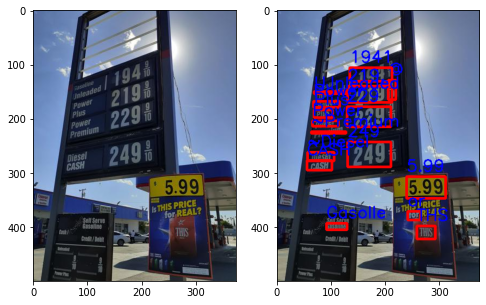

In [8]:
overlay_ocr_text(r'/content/digits_2.jpg')

the squence is => Com Puder_Visibnia Stud $ and appla Ac Hods uhtch alaw ters under slayinage Gntea G rayscalz is an iwhich #c valac c cach pikelis 3 lgl Samol_ it Gmposed of_shadcs of gy , Varhg Crom black GUI * A Graphic User_Lntec laG isa mc Aod cF interac-i13  W; # @mputer His Togram P+ is agra d isplyy Jerived Ly me number &Abixels of <ach given oE Clor avjes Mna two 0; mensional_(2DJor dimmsienal /D) Clor Cal HSV e> [Huz Saturqtibrs Valuz] fius Color space in -erms of tnrze Cas #tutnt Comfenen 0;fCerence Aace niton and 32722fon Cace ZeleeAin Yow to Scc_whcn ever & GaCe ~shap  Lzen  seteted and crea de an allum o€ Ca Sce Paee rognitbn Can) match face #apersen yoy t Sze wm )is Tke 46^ Cme" jmsg  phicl itis csnting Jef_ Avc J4.4e CaCe Tccoy allus has 4 Ces 4ne eui allowirg 


(<matplotlib.image.AxesImage at 0x7fdbf00324f0>,
                                                  bbox                text  \
 0            [[8, 64], [218, 64], [218, 92], [8, 92]]  Com Puder_Visibnia   
 1        [[266, 66], [384, 66], [384, 98], [266, 98]]          Stud $ and   
 2        [[400, 64], [462, 64], [462, 96], [400, 96]]               appla   
 3        [[545, 75], [577, 75], [577, 93], [545, 93]]                  Ac   
 4        [[574, 66], [634, 66], [634, 94], [574, 94]]                Hods   
 ..                                                ...                 ...   
 90  [[484.0513167019495, 544.1539501058485], [525....                   4   
 91  [[542.8858279709377, 553.2145699273442], [583....                 Ces   
 92  [[362.99099080900555, 578.1747742652154], [404...                 4ne   
 93  [[456.6546544120074, 592.5201198532081], [484....                 eui   
 94  [[598.1758366163078, 581.1154281570775], [676....            allowirg   
 
         conf

<Figure size 432x288 with 0 Axes>

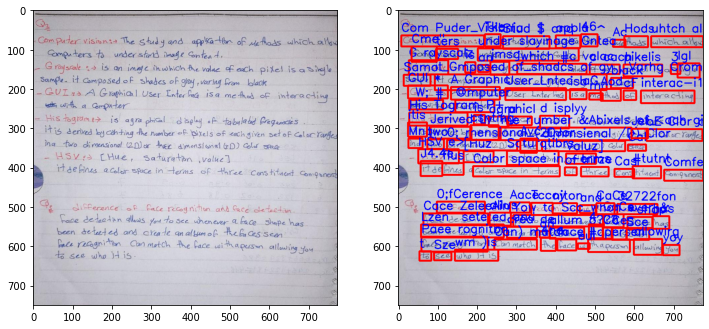

In [9]:
overlay_ocr_text(r'/content/Capture2.PNG')

the squence is => Hi 1, tnis t0 my 15 te ring I0 ten to q To in lke tc  to cbomcines " ib hete ofincualy, edcli- subre hand Reddi across lcve came my Since Snare ana I'd today tnougnt Tnis penmanship' nandwri Wri For everyday Style own that tnis normal; Mike and Wri now. I've ycars neat; write , severa uick it"s read: whito easy mol and clisive: Htapka and Still, ncat But Avhitc. (ONout sllcchotu 


(<matplotlib.image.AxesImage at 0x7fdbd802ad60>,
                                                  bbox       text      conf
 0        [[88, 94], [120, 94], [120, 118], [88, 118]]         Hi  0.954862
 1      [[197, 81], [219, 81], [219, 101], [197, 101]]         1,  0.292737
 2      [[284, 84], [341, 84], [341, 113], [284, 113]]       tnis  0.984215
 3      [[397, 95], [425, 95], [425, 115], [397, 115]]         t0  0.237436
 4    [[433, 135], [471, 135], [471, 155], [433, 155]]         my  0.996042
 ..                                                ...        ...       ...
 70  [[230.21114561800016, 421.4222912360003], [293...        But  0.999362
 71  [[146.7701175612585, 444.99310580513264], [223...    Avhitc.  0.818556
 72  [[240.1370142686695, 445.46032711047206], [323...     (ONout  0.460292
 73  [[146.61380005491242, 465.36416017571975], [27...     Rc Eiz  0.081529
 74  [[373.9038403974048, 553.1326882781833], [487....  sllcchotu  0.315309
 
 [75 rows x 3 columns])

<Figure size 432x288 with 0 Axes>

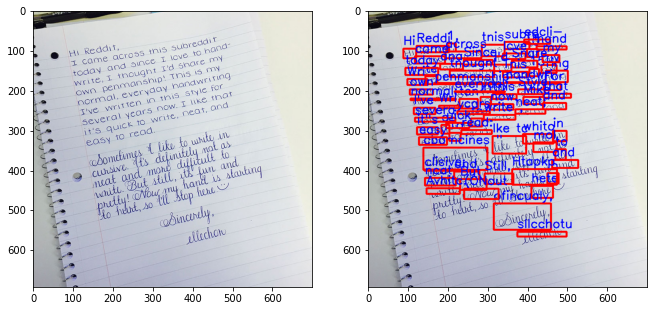

In [10]:
overlay_ocr_text(r'/content/handwriting_1.jpg')

the squence is => 9) ayglla HOMFLESS 9lease eelp tts Ufeed_ @hettei: dobs Syf: 018 99446 %@ od _ Glelking: Roubing (Gavfahe 93R 


(<matplotlib.image.AxesImage at 0x7fdbac07dca0>,
                                                  bbox             text  \
 0    [[183, 241], [277, 241], [277, 333], [183, 333]]               9)   
 1    [[265, 225], [527, 225], [527, 383], [265, 383]]           ayglla   
 2    [[184, 376], [566, 376], [566, 502], [184, 502]]         HOMFLESS   
 3    [[177, 507], [529, 507], [529, 591], [177, 591]]  9lease eelp tts   
 4    [[184, 580], [275, 580], [275, 633], [184, 633]]           Ufeed_   
 5    [[425, 587], [531, 587], [531, 631], [425, 631]]         @hettei:   
 6    [[183, 629], [259, 629], [259, 671], [183, 671]]             dobs   
 7    [[283, 635], [351, 635], [351, 679], [283, 679]]             Syf:   
 8    [[353, 653], [377, 653], [377, 667], [353, 667]]              018   
 9    [[196, 696], [475, 696], [475, 763], [196, 763]]         99446 %@   
 10   [[181, 747], [275, 747], [275, 831], [181, 831]]             od _   
 11  [[295.9973506193548, 575.0843686541932], [416.

<Figure size 432x288 with 0 Axes>

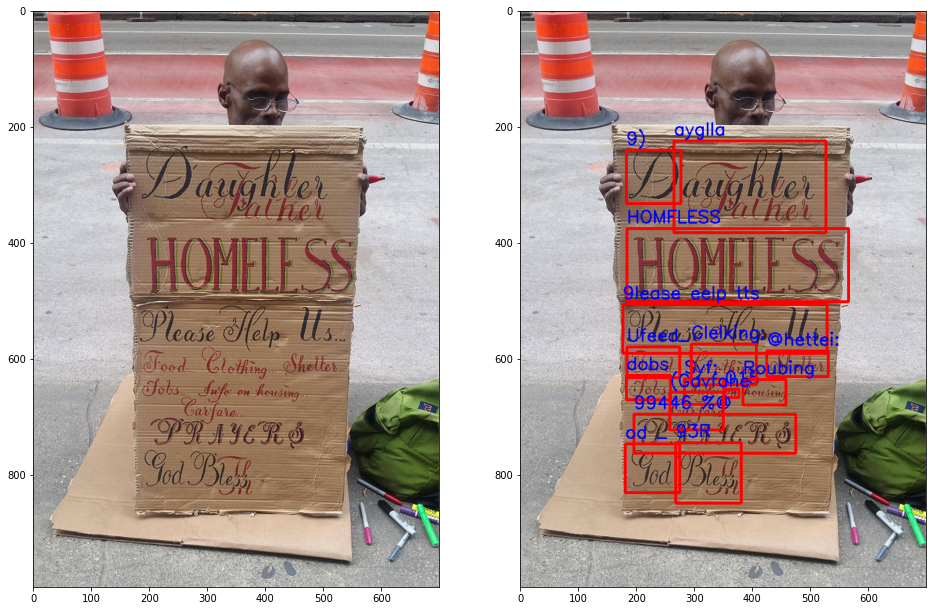

In [11]:
overlay_ocr_text(r'/content/handwriting_2.jpg')

the squence is => BOOK OF HOMAGE TO SHAKESPEARE GOLLANCZ contemporary of Shakespeare, Joseph Fletcher, saw 'somcthing of this aspect of the play , in his poem_ Christ $ Bloodie Stceat , 1613 He dicd indccd; not dics BITS OF TIMBER:  SOME OBSERV ATIONS ON To die tcdy shew the aud encc_ SHAKESPEARLAN XAMES SHYLOCK The idlc Rabiteor ; ol inforcul The cros. his suge phycd thc pin POLOXIUS' MALUOLIO Of one that for hi; Iricnd dil pawa Various speculations have been hazarded t0 the origin of the namg Shylock Caleb Shillocke, his prophecic, often adduced later than theplay the suggested  connexion with   Scialac SHAKESPEAREin The Mcrchant of Venice; as elsewhere, unconsciously Maronite of Mount Lebanon hardly commends itsclf divined the germ of the myth which his genius worked_ Endless to serious consideration, nor do the other theorics propounded, analogucs are quoted for the two stories blended in the play and Whether   Shakespeare his predeccssor g4ve the nan know Shakespeare s debt to the

(<matplotlib.image.AxesImage at 0x7fdb480f8e20>,
                                                   bbox  \
 0           [[99, 16], [357, 16], [357, 35], [99, 35]]   
 1         [[701, 15], [779, 15], [779, 29], [701, 29]]   
 2         [[577, 39], [669, 39], [669, 55], [577, 55]]   
 3         [[668, 37], [855, 37], [855, 58], [668, 58]]   
 4         [[851, 36], [926, 36], [926, 60], [851, 60]]   
 ..                                                 ...   
 210  [[891.2567058537528, 499.33103526837755], [921...   
 211  [[643.2567058537528, 529.3310352683776], [673....   
 212  [[286.14250707428744, 548.4855042445724], [315...   
 213  [[27.390289239150306, 554.2073760108954], [68....   
 214  [[815.4187618062809, 554.1862665287932], [846....   
 
                                   text      conf  
 0        BOOK OF HOMAGE TO SHAKESPEARE  0.972172  
 1                             GOLLANCZ  0.991797  
 2                      contemporary of  0.946276  
 3    Shakespeare, Joseph Fletche

<Figure size 432x288 with 0 Axes>

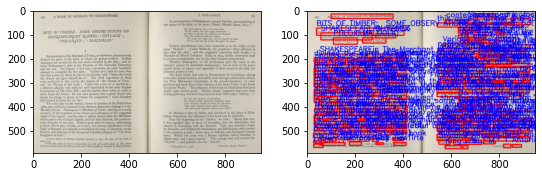

In [12]:
overlay_ocr_text(r'/content/handwriting_3.jpg')

the squence is => GT2a agk & Irainer functional fitness jumpstar t Your (8) 50 min sessions $/99 Per person circuit based workout with multiple stations focusing on core and functional strength register early class lmited to [8]- June 21 monday and friday 4am IOam at the front desk @ Iumated. sign UP space GT24 stabilty august 


(<matplotlib.image.AxesImage at 0x7fdb480953d0>,
                                                  bbox  \
 0          [[546, 0], [700, 0], [700, 68], [546, 68]]   
 1        [[279, 75], [321, 75], [321, 93], [279, 93]]   
 2    [[563, 115], [663, 115], [663, 134], [563, 134]]   
 3    [[179, 116], [406, 116], [406, 156], [179, 156]]   
 4    [[565, 135], [679, 135], [679, 155], [565, 155]]   
 5    [[120, 152], [400, 152], [400, 184], [120, 184]]   
 6    [[402, 166], [440, 166], [440, 190], [402, 190]]   
 7    [[445, 171], [513, 171], [513, 189], [445, 189]]   
 8      [[96, 197], [256, 197], [256, 225], [96, 225]]   
 9    [[262, 202], [488, 202], [488, 234], [262, 234]]   
 10     [[94, 223], [306, 223], [306, 261], [94, 261]]   
 11   [[311, 237], [339, 237], [339, 253], [311, 253]]   
 12   [[345, 237], [389, 237], [389, 253], [345, 253]]   
 13   [[146, 256], [424, 256], [424, 286], [146, 286]]   
 14   [[139, 299], [241, 299], [241, 332], [139, 332]]   
 15   [[248, 302], [312

<Figure size 432x288 with 0 Axes>

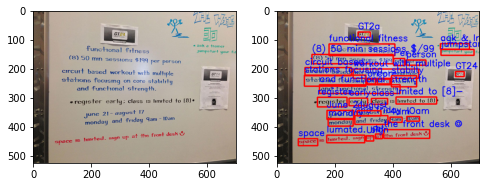

In [13]:
overlay_ocr_text(r'/content/handwriting_4.jpg')

the squence is => Stop For My Credit Card   Info For Free Trials Asking 


(<matplotlib.image.AxesImage at 0x7fdb480a69a0>,
                                                 bbox         text      conf
 0     [[271, 74], [346, 74], [346, 119], [271, 119]]         Stop  0.994252
 1   [[335, 115], [381, 115], [381, 151], [335, 151]]          For  0.999501
 2   [[236, 150], [381, 150], [381, 198], [236, 198]]    My Credit  0.959154
 3   [[232, 185], [386, 185], [386, 228], [232, 228]]  Card   Info  0.492744
 4   [[286, 222], [330, 222], [330, 248], [286, 248]]          For  0.548802
 5   [[233, 249], [385, 249], [385, 291], [233, 291]]  Free Trials  0.999100
 6  [[229.91534771090673, 109.11906469908024], [33...       Asking  0.742999)

<Figure size 432x288 with 0 Axes>

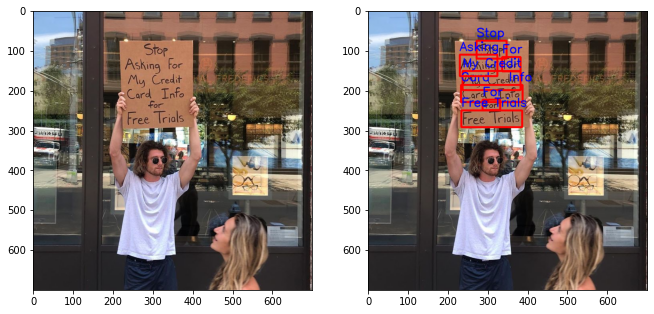

In [14]:
overlay_ocr_text(r'/content/handwriting_5.jpg')

the squence is => Nice Weather Doesnt Meon Covid Is Over 


(<matplotlib.image.AxesImage at 0x7fdafd6c7d90>,
                                                bbox           text      conf
 0    [[272, 80], [500, 80], [500, 134], [272, 134]]   Nice Weather  0.566195
 1  [[272, 133], [383, 133], [383, 186], [272, 186]]         Doesnt  0.784123
 2  [[401, 131], [491, 131], [491, 175], [401, 175]]           Meon  0.673550
 3  [[245, 183], [501, 183], [501, 249], [245, 249]]  Covid Is Over  0.612320)

<Figure size 432x288 with 0 Axes>

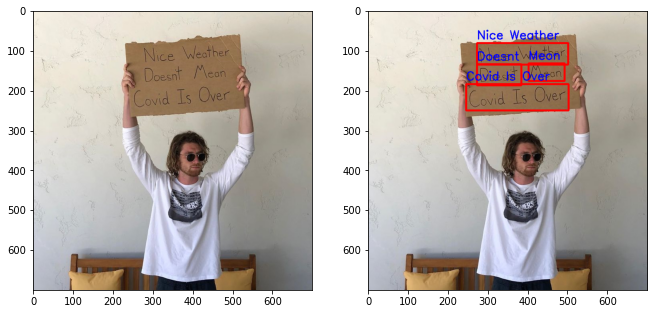

In [15]:
overlay_ocr_text(r'/content/handwriting_6.jpg')

the squence is => Deloitte Vietcombank 2022 Tax & Customs Update Seminar 14.00 16.00 Friday, 28th October; 2022 10th Floor; Vietcombank Long An Branch, No.2A Pham Van Ngu Street; Quarter 5, Ben Luc Town, Ben Luc District, Long An Province Deloitte Vietnam and Joint Stock Commercial Bank For Foreign Trade of Vietnam (Vietcombank) sincerely invite Chinese-speaking companies in Long An province to join a seminar on "2022 Vietnam Tax & Customs Update", in which we will update you the  practical and useful information on Tax and Customs policy and regulations as well as Vietcombanks special trade finance products to help you proactively managing tax risks, successfully operating business in Vietnam's rapidly changing business environment_ Language: Mandarin Chinese Fee: Complimentary ticket Time Topics Keynote speaker 13.30 - 14:00 Check-in 14.00 - 14.05 Opening Vietcombank delegation 14.05 - 14.30 2022 Tax and Customs Policy Outlook Mr: Brian Vietnam Economic and Tax collection Director; C

(<matplotlib.image.AxesImage at 0x7fdafd605cd0>,
                                                  bbox  \
 0        [[55, 57], [315, 57], [315, 125], [55, 125]]   
 1      [[347, 71], [630, 71], [630, 124], [347, 124]]   
 2      [[56, 194], [532, 194], [532, 248], [56, 248]]   
 3      [[57, 261], [445, 261], [445, 325], [57, 325]]   
 4    [[150, 374], [212, 374], [212, 398], [150, 398]]   
 ..                                                ...   
 79  [[899, 1839], [1013, 1839], [1013, 1855], [899...   
 80  [[65, 1855], [859, 1855], [859, 1871], [65, 18...   
 81  [[79, 1871], [373, 1871], [373, 1887], [79, 18...   
 82  [[764.9580569325292, 993.1867537178289], [825....   
 83  [[814.9580569325292, 1143.1867537178289], [857...   
 
                                                  text      conf  
 0                                            Deloitte  0.999952  
 1                                         Vietcombank  0.999160  
 2                                  2022 Tax & Custo

<Figure size 432x288 with 0 Axes>

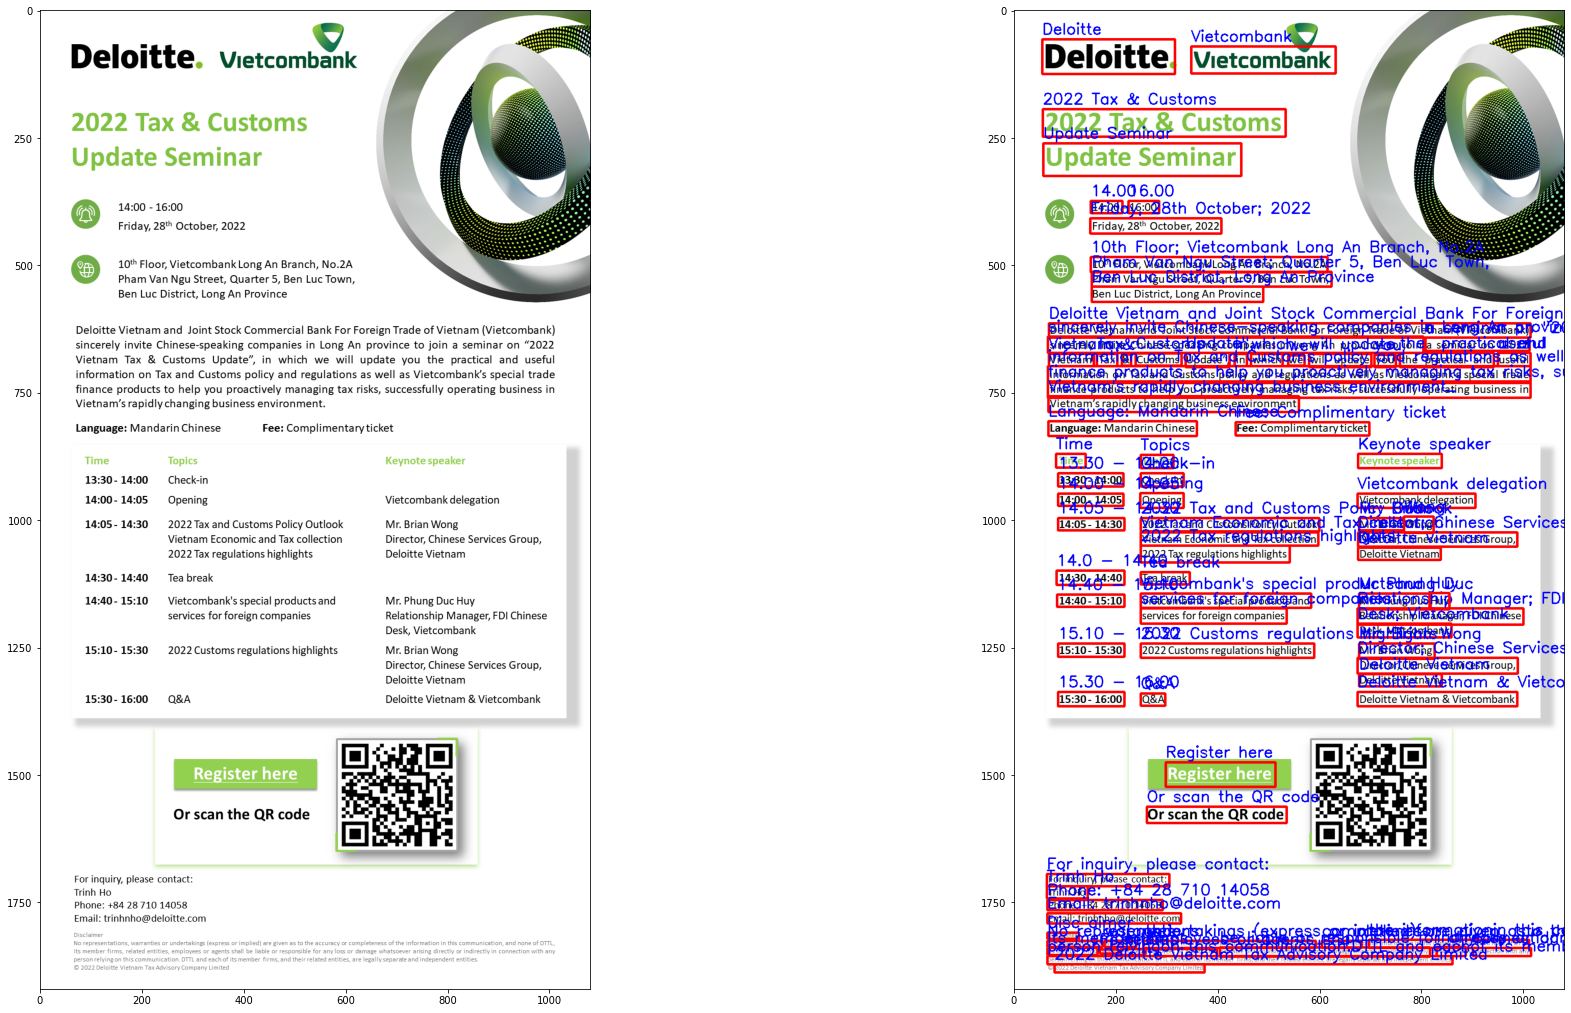

In [16]:
overlay_ocr_text(r'/content/invoice.jpg')

the squence is => NOTICE THANK YOU FOR NOTICING ThiS NEW NOTICE Your noticing it HAS BEEN NOTED ANO Viill Be Aeported To The Authorities 


(<matplotlib.image.AxesImage at 0x7fdafd555f70>,
                                                 bbox  \
 0     [[169, 61], [509, 61], [509, 147], [169, 147]]   
 1   [[193, 169], [364, 169], [364, 219], [193, 219]]   
 2   [[378, 170], [484, 170], [484, 218], [378, 218]]   
 3     [[92, 218], [200, 218], [200, 266], [92, 266]]   
 4   [[218, 216], [454, 216], [454, 266], [218, 266]]   
 5   [[470, 214], [586, 214], [586, 264], [470, 264]]   
 6   [[182, 266], [300, 266], [300, 314], [182, 314]]   
 7   [[318, 264], [502, 264], [502, 314], [318, 314]]   
 8   [[157, 338], [474, 338], [474, 381], [157, 381]]   
 9   [[487, 341], [527, 341], [527, 377], [487, 377]]   
 10  [[165, 379], [251, 379], [251, 419], [165, 419]]   
 11  [[262, 377], [523, 377], [523, 419], [262, 419]]   
 12    [[92, 446], [596, 446], [596, 476], [92, 476]]   
 
                                         text      conf  
 0                                     NOTICE  0.999966  
 1                                 

<Figure size 432x288 with 0 Axes>

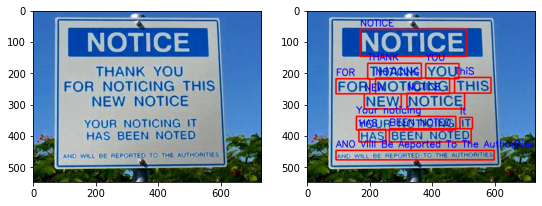

In [17]:
overlay_ocr_text(r'/content/sign_1.jpg')

the squence is => Notice If you notice this notice you will notice that this notice is noticing: not worth 


(<matplotlib.image.AxesImage at 0x7fdafd4e3d90>,
                                                 bbox                text  \
 0   [[136, 131], [537, 131], [537, 277], [136, 277]]              Notice   
 1   [[134, 276], [546, 276], [546, 372], [134, 372]]  If you notice this   
 2   [[169, 351], [526, 351], [526, 439], [169, 439]]     notice you will   
 3   [[152, 423], [509, 423], [509, 510], [152, 510]]    notice that this   
 4   [[194, 499], [406, 499], [406, 579], [194, 579]]           notice is   
 5   [[312, 557], [505, 557], [505, 633], [312, 633]]           noticing:   
 6  [[399.4345458491434, 501.2078196418304], [485....                 not   
 7  [[171.6456452210129, 591.4078066188362], [317....               worth   
 
        conf  
 0  0.627216  
 1  0.893091  
 2  0.998428  
 3  0.975925  
 4  0.998113  
 5  0.892806  
 6  0.999956  
 7  0.917829  )

<Figure size 432x288 with 0 Axes>

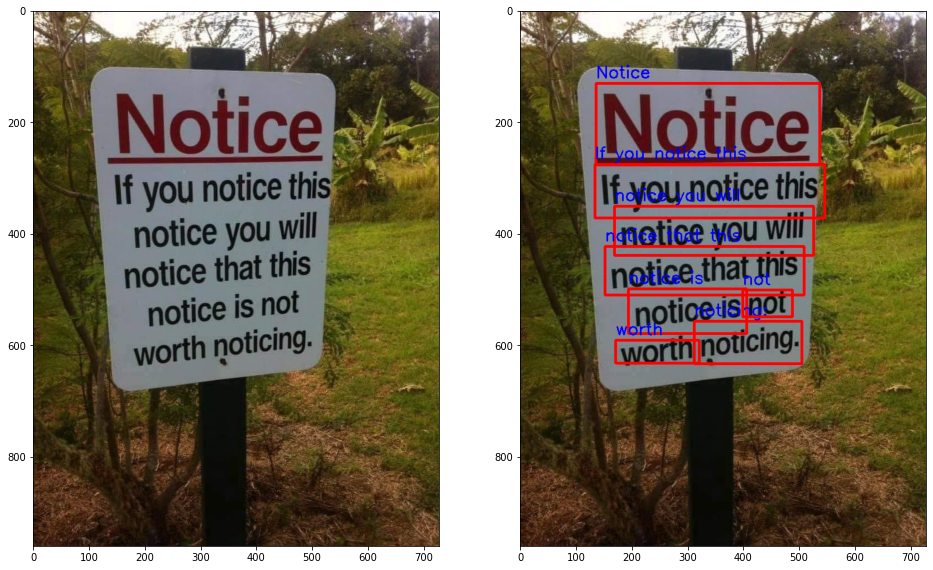

In [18]:
overlay_ocr_text(r'/content/sign_2.jpg')